# Exploratory Data Analysis : LUNCH BOX in USA

In [1]:
# import librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go

In [2]:
# import data
datapath = './../data/'
df = pd.read_excel(datapath + 'sold_product.xlsx')
df.head()

,date_sign_up,customer_id,product_name,marketing_channel,City,Gross Product Margin,Overall Product Margin,Count of product
0,2015-04-16 07:35:22,201307,Classic - 3 meals per week for 2 people,TV / Radio Advertising,San Diego,35,25.0,1
1,2015-04-13 12:08:19,205322,Classic - 3 meals per week for 2 people,Newsletters (internal),Chicago,35,34.0,1
2,2015-04-13 08:10:19,214667,Classic - 3 meals per week for 2 people,TV / Radio Advertising,Chicago,35,34.0,1
3,2015-04-13 08:50:19,215381,Classic - 3 meals per week for 2 people,Newsletters (internal),Chicago,35,34.0,1
4,2015-04-13 09:09:18,215561,Classic - 3 meals per week for 2 people,Newsletters (internal),Chicago,35,34.0,1


## 1/How many customers purchased more than 1 product?

In [3]:
# using groupby: 
customer_counts = df.groupby('customer_id')['Count of product'].sum()
cust = customer_counts[customer_counts > 1 ]
print(len(cust), 'customers have bought > 1 product')

4 customers have bought > 1 product


In [4]:
# using only the columns Count of product: 
print('customers ID =' ,df[(df['Count of product']>1)]['customer_id'].unique())
print(len(df[(df['Count of product']>1)]['customer_id'].unique()), 'customers have bought > 1 product')

customers ID = [226594 220418 221501 221710]
4 customers have bought > 1 product


In [5]:
# This table reveal all customer that bought more than 1 product 
# by looking for all the value different than 1 in the column count of product: 
display(df[(df['Count of product']!=1)])
print('We conclude that in this dataset one customer bought 3 (ID triplicate) products and 3 customer bought 2 products (ID duplicate)') 

,date_sign_up,customer_id,product_name,marketing_channel,City,Gross Product Margin,Overall Product Margin,Count of product
314,2015-04-19 19:56:20,226594,Classic - 3 meals per week for 2 people,Newsletters (internal),Miami,35,26.5,2
315,2015-04-19 19:56:21,226594,Classic - 3 meals per week for 4 people,Newsletters (internal),Miami,58,49.5,2
353,2015-04-15 09:55:21,220418,Classic - 3 meals per week for 4 people,Newsletters (internal),Philadelphia,58,56.0,3
354,2015-04-15 09:55:22,220418,Classic - 3 meals per week for 4 people,Newsletters (internal),Philadelphia,58,56.0,3
439,2015-04-15 09:55:22,220418,Classic - 3 meals per week for 2 people,Newsletters (internal),Philadelphia,35,33.0,3
440,2015-04-15 18:12:20,221501,3 Meals (vegetarian) for 4 people,Newsletters (internal),Philadelphia,52,50.0,2
441,2015-04-15 18:12:20,221501,Classic - 3 meals per week for 2 people,Newsletters (internal),Philadelphia,35,33.0,2
474,2015-04-15 19:32:18,221710,3 Meals (vegetarian) for 2 people,Newsletters (internal),San Diego,37,27.0,2
475,2015-04-15 19:32:18,221710,Classic - 3 meals per week for 4 people,Newsletters (internal),San Diego,58,48.0,2


We conclude that in this dataset one customer bought 3 (ID triplicate) products and 3 customer bought 2 products (ID duplicate)


## 2/ Visualizing a chart that shows number of sold food boxes per weekday 

In [6]:
# show the dataframe table
df['weekday'] = df['date_sign_up'].dt.day_name()
df.head()

,date_sign_up,customer_id,product_name,marketing_channel,City,Gross Product Margin,Overall Product Margin,Count of product,weekday
0,2015-04-16 07:35:22,201307,Classic - 3 meals per week for 2 people,TV / Radio Advertising,San Diego,35,25.0,1,Thursday
1,2015-04-13 12:08:19,205322,Classic - 3 meals per week for 2 people,Newsletters (internal),Chicago,35,34.0,1,Monday
2,2015-04-13 08:10:19,214667,Classic - 3 meals per week for 2 people,TV / Radio Advertising,Chicago,35,34.0,1,Monday
3,2015-04-13 08:50:19,215381,Classic - 3 meals per week for 2 people,Newsletters (internal),Chicago,35,34.0,1,Monday
4,2015-04-13 09:09:18,215561,Classic - 3 meals per week for 2 people,Newsletters (internal),Chicago,35,34.0,1,Monday


In [7]:
# looking for NaN (Not a Number) in the dataframe 
df.isna().sum()

date_sign_up              0
customer_id               0
product_name              0
marketing_channel         0
City                      0
Gross Product Margin      0
Overall Product Margin    0
Count of product          0
weekday                   0
dtype: int64

In [8]:
# count nb of product sold per weekday
sold_per_weekday = df.groupby('weekday')['Count of product'].sum()
sold_per_weekday

weekday
Friday        71
Monday       105
Saturday      87
Sunday       130
Thursday      63
Tuesday      221
Wednesday    197
Name: Count of product, dtype: int64

In [9]:
sold_per_weekday.index

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object', name='weekday')

In [10]:
sold_per_weekday.values

array([ 71, 105,  87, 130,  63, 221, 197])

In [11]:
[sold_per_weekday.index[1], sold_per_weekday.index[2]]

['Monday', 'Saturday']

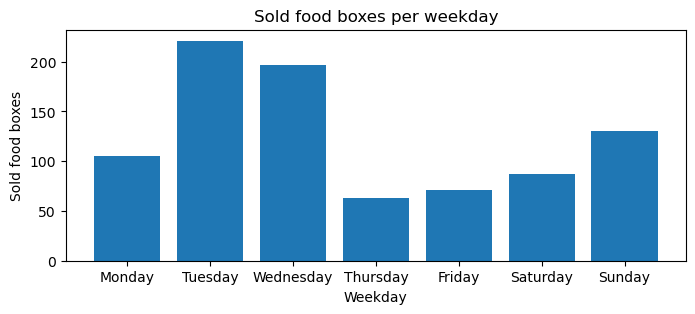

In [12]:
# reorder weekdays
plt.figure(figsize = (8,3))
X= [sold_per_weekday.index[1], 
    sold_per_weekday.index[-2],
    sold_per_weekday.index[-1],
    sold_per_weekday.index[-3],
    sold_per_weekday.index[0],
    sold_per_weekday.index[2],
    sold_per_weekday.index[3],
   ]
Y = [sold_per_weekday.values[1], 
    sold_per_weekday.values[-2],
    sold_per_weekday.values[-1],
    sold_per_weekday.values[-3],
    sold_per_weekday.values[0],
    sold_per_weekday.values[2],
    sold_per_weekday.values[3],
   ]
plt.bar(X, Y)
plt.xlabel('Weekday')
plt.ylabel("Sold food boxes")
plt.title('Sold food boxes per weekday')
plt.show()

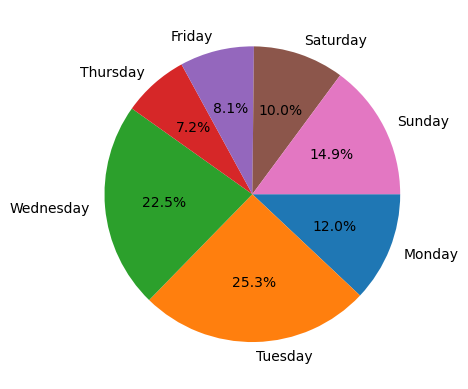

In [13]:
# Alternative way of visualizing using a Pie Chart with percentage. 
plt.pie(x=Y, 
        labels=X, 
        autopct =  lambda x: str(x.round(1)) + '%',
        counterclock=False
       ); 


In [14]:
print('Conclusion: We have provide figures to visualize sold box per weeekday')

Conclusion: We have provide figures to visualize sold box per weeekday


## 3/ How many products sold for 2 people vs for 4 people?

In [15]:
# count for each product types
df['product_name'].value_counts()

product_name
Classic - 3 meals per week for 2 people    635
Classic - 3 meals per week for 4 people    130
3 Meals (vegetarian) for 2 people           85
3 Meals (vegetarian) for 4 people           12
Name: count, dtype: int64

In [16]:
df.groupby('product_name')['Count of product'].sum()
# 'the mismatch between value count and groupby come from the triplicate (see the end of section 1/) ')
# in that case value count is more accurate')

product_name
3 Meals (vegetarian) for 2 people           86
3 Meals (vegetarian) for 4 people           13
Classic - 3 meals per week for 2 people    639
Classic - 3 meals per week for 4 people    136
Name: Count of product, dtype: int64

In [17]:
# function to read number of people (2 or 4): 

def number_of_people(x):
    if '2' in x :
        return 2

    elif '4' in x :
        return 4

df['number of people'] = df['product_name'].apply(number_of_people)
# display new table 
display(df.iloc[0:-1,2:-1].head())

### option 1 (with count)
print('option1 (with count) = \n', df.groupby('number of people')['Count of product'].count());

### option 2 (with sum)
print('option2 (with sum) = \n', df.groupby('number of people')['Count of product'].sum());

print('because of what we have seen in section 1/ we favor option 1 here \n')

print('CONCLUSION = 720 product sold for 2 people and 142 product sold for 4 people') 

,product_name,marketing_channel,City,Gross Product Margin,Overall Product Margin,Count of product,weekday
0,Classic - 3 meals per week for 2 people,TV / Radio Advertising,San Diego,35,25.0,1,Thursday
1,Classic - 3 meals per week for 2 people,Newsletters (internal),Chicago,35,34.0,1,Monday
2,Classic - 3 meals per week for 2 people,TV / Radio Advertising,Chicago,35,34.0,1,Monday
3,Classic - 3 meals per week for 2 people,Newsletters (internal),Chicago,35,34.0,1,Monday
4,Classic - 3 meals per week for 2 people,Newsletters (internal),Chicago,35,34.0,1,Monday


option1 (with count) = 
 number of people
2    720
4    142
Name: Count of product, dtype: int64
option2 (with sum) = 
 number of people
2    725
4    149
Name: Count of product, dtype: int64
because of what we have seen in section 1/ we favor option 1 here 

CONCLUSION = 720 product sold for 2 people and 142 product sold for 4 people


## 4/ How many food boxes "Classic - 3 meals per week for 2 people" were sold via marketing channel "TV / Radio Advertising"?

In [18]:
# quick answer:

counts_sold = df.loc[(df['marketing_channel'] == 'TV / Radio Advertising') & (df['product_name'] == 'Classic - 3 meals per week for 2 people' ) ]
print('answer=',counts_sold['Count of product'].count())

answer= 203


In [19]:
# long answer, explained in details:
#creating a subtable with 2 columns
subtab = df[['product_name', 'marketing_channel']]; 
display(subtab.head())
# count occurence of each value type in each columns: 
print(df.marketing_channel.value_counts(), '\n')
print(df.product_name.value_counts(), '\n')

# looking for intersection between TVradio AND Classic2people
idx_Classic2people = subtab.product_name=='Classic - 3 meals per week for 2 people';
print('Nb of idx_Classic2people is True = ',  idx_Classic2people.sum())
idx_TVradio = subtab.marketing_channel=='TV / Radio Advertising'; 
print('Nb of idx_TVradio is True  = ',  idx_TVradio.sum())
intersect = idx_Classic2people & idx_TVradio
print('The intersection is = ',  intersect.sum(), '\n')
print('Conclusion: the Nb of "Classic food boxes for 2 people" via "TV/radio" advertising is =', 
      intersect.sum())

,product_name,marketing_channel
0,Classic - 3 meals per week for 2 people,TV / Radio Advertising
1,Classic - 3 meals per week for 2 people,Newsletters (internal)
2,Classic - 3 meals per week for 2 people,TV / Radio Advertising
3,Classic - 3 meals per week for 2 people,Newsletters (internal)
4,Classic - 3 meals per week for 2 people,Newsletters (internal)


marketing_channel
Newsletters (internal)     409
TV / Radio Advertising     259
Search Engine Marketing    105
Partnership Marketing       89
Name: count, dtype: int64 

product_name
Classic - 3 meals per week for 2 people    635
Classic - 3 meals per week for 4 people    130
3 Meals (vegetarian) for 2 people           85
3 Meals (vegetarian) for 4 people           12
Name: count, dtype: int64 

Nb of idx_Classic2people is True =  635
Nb of idx_TVradio is True  =  259
The intersection is =  203 

Conclusion: the Nb of "Classic food boxes for 2 people" via "TV/radio" advertising is = 203


## 5/Adding a "state" column in the dataframe indicating the state name

In [20]:
# create a new dataframe (state) from a new data file (state.csv)
state = pd.read_csv(datapath +  'state.csv')
# show the table state
display(state.head())
print('columns =', np.array(state.columns))
print('lignes =' , np.array(state.iloc[0,:]))

,State,California,California.1,California.2,Florida,Pennsylvania,Washington,Illinois,New York
0,City,San Diego,Los Angeles,San Francisco,Miami,Philadelphia,Washington,Chicago,New York


columns = ['State' 'California' 'California.1' 'California.2' 'Florida'
 'Pennsylvania' 'Washington' 'Illinois' 'New York']
lignes = ['City' 'San Diego' 'Los Angeles' 'San Francisco' 'Miami' 'Philadelphia'
 'Washington' 'Chicago' 'New York']


In [21]:
# Creating my_tab_state
my_tab_state = pd.DataFrame();
my_tab_state['State']= np.array(state.columns); 
my_tab_state['City']= np.array(state.iloc[0,:]); 
my_tab_state.drop([0],inplace=True)
my_tab_state.head(10)

,State,City
1,California,San Diego
2,California.1,Los Angeles
3,California.2,San Francisco
4,Florida,Miami
5,Pennsylvania,Philadelphia
6,Washington,Washington
7,Illinois,Chicago
8,New York,New York


In [22]:
# Merging  Californian Cities into one state 
df = df.merge(right=my_tab_state , on= 'City', how= 'outer')


In [23]:
# display new table 
df.iloc[0:-1,2:-1].head()

,product_name,marketing_channel,City,Gross Product Margin,Overall Product Margin,Count of product,weekday,number of people
0,Classic - 3 meals per week for 2 people,TV / Radio Advertising,San Diego,35,25.0,1,Thursday,2
1,Classic - 3 meals per week for 4 people,Search Engine Marketing,San Diego,58,48.0,1,Thursday,4
2,Classic - 3 meals per week for 2 people,TV / Radio Advertising,San Diego,35,25.0,1,Thursday,2
3,Classic - 3 meals per week for 4 people,Newsletters (internal),San Diego,58,48.0,1,Thursday,4
4,Classic - 3 meals per week for 4 people,Newsletters (internal),San Diego,58,48.0,1,Friday,4


In [24]:
df.State.value_counts()

State
California      204
Florida         163
California.2    136
Pennsylvania    125
California.1    122
Washington       49
Illinois         39
New York         15
Name: count, dtype: int64

In [25]:
# Grouping Californian Cities into one state 
df.State = df.State.replace(to_replace=['California.1','California.2'],value=['California', 'California'])
df.State.value_counts()

State
California      462
Florida         163
Pennsylvania    125
Washington       49
Illinois         39
New York         15
Name: count, dtype: int64

In [26]:
df['City'].unique()

array(['San Diego', 'Chicago', 'Los Angeles', 'Miami', 'New York',
       'Philadelphia', 'San Dego', 'San Diego ', 'San Francisco',
       'SanDiego', 'Washington'], dtype=object)

In [27]:
# look for NaNs
display(df.isna().sum())
print('attention there is 9 NANs in column state')

date_sign_up              0
customer_id               0
product_name              0
marketing_channel         0
City                      0
Gross Product Margin      0
Overall Product Margin    0
Count of product          0
weekday                   0
number of people          0
State                     9
dtype: int64

attention there is 9 NANs in column state


In [34]:
df2 = df.iloc[0:-1,2:-1]
df2.head()

,product_name,marketing_channel,City,Gross Product Margin,Overall Product Margin,Count of product,weekday,number of people
0,Classic - 3 meals per week for 2 people,TV / Radio Advertising,San Diego,35,25.0,1,Thursday,2
1,Classic - 3 meals per week for 4 people,Search Engine Marketing,San Diego,58,48.0,1,Thursday,4
2,Classic - 3 meals per week for 2 people,TV / Radio Advertising,San Diego,35,25.0,1,Thursday,2
3,Classic - 3 meals per week for 4 people,Newsletters (internal),San Diego,58,48.0,1,Thursday,4
4,Classic - 3 meals per week for 4 people,Newsletters (internal),San Diego,58,48.0,1,Friday,4


In [33]:
# display states with NAN in the column state: 
df2[df2['State'].isna()]

KeyError: 'State'

In [ ]:
# Replace NANs with 'California' in the state column
df['State'] = df['State'].fillna('California')

In [ ]:
df[df['State'].isna()]

In [ ]:
print('Conclusion: We have successfully added a clean column state in the dataframe')

## 6/ Which marketing channels worked best in which states?

In [ ]:
df[['marketing_channel','State','Count of product']].head()

In [ ]:
overview = df.groupby(['State', 'marketing_channel'])['Count of product'].sum()

df.groupby(['State', 'marketing_channel'])['Count of product'].sum()

In [ ]:
overview.unstack()

In [ ]:
# visualize a graph that display nb of box sold per marketing channels types and in each states
import seaborn as sns  # I use seaborn library here
sns.countplot(x='State',hue='marketing_channel', data=df); 
plt.xticks(rotation='vertical');
plt.title('number of boxes sold per marketing channel per state');

In [ ]:
print('Conclusion: 1/ we observe in our data California, Florida, and Pennsyvannia are the states that buy the most Lunch box'
    , '2/ The Adverstinsing the most usefull is seen via Newsletters(internal) and TV / radio media.')